# Bank Churn Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTEN, SMOTE
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
churn_data = pd.read_csv('Customer-Churn-Records.csv')

In [5]:
df = churn_data.copy()

In [6]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

### Drop column ที่ไม่จำเป็น

In [8]:
drop_feature = ['Surname', 'RowNumber', 'CustomerId']
df = df.drop(drop_feature, axis=1)

In [9]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


## แบ่ง Train/Test set

In [10]:
X = df.drop('Exited', axis=1)
y = df['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

## One-Hot Encoding

In [11]:
categorical_col = df.select_dtypes(include='object').columns
numerical_col = df.select_dtypes(exclude='object').columns

In [12]:
categorical_col

Index(['Geography', 'Gender', 'Card Type'], dtype='object')

In [13]:
ordinal_encoder = OrdinalEncoder()
oh_encoder = OneHotEncoder(sparse_output=False).set_output(transform='pandas')

for col in categorical_col:
    # if col == 'Gender':
    #     X_train[col] = ordinal_encoder.fit_transform(X_train[[col]]).astype('int64')
    #     X_test[col] = ordinal_encoder.transform(X_test[[col]]).astype('int64')
    # else:
        d_train = oh_encoder.fit_transform(X_train[[col]])
        X_train = pd.concat([
            X_train.drop(col, axis=1),
            d_train.astype('int64')
        ], axis=1)
        d_test = oh_encoder.transform(X_test[[col]])
        X_test = pd.concat([
            X_test.drop(col, axis=1),
            d_test.astype('int64')
        ], axis=1)


In [14]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7000 entries, 9069 to 7270
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         7000 non-null   int64  
 1   Age                 7000 non-null   int64  
 2   Tenure              7000 non-null   int64  
 3   Balance             7000 non-null   float64
 4   NumOfProducts       7000 non-null   int64  
 5   HasCrCard           7000 non-null   int64  
 6   IsActiveMember      7000 non-null   int64  
 7   EstimatedSalary     7000 non-null   float64
 8   Complain            7000 non-null   int64  
 9   Satisfaction Score  7000 non-null   int64  
 10  Point Earned        7000 non-null   int64  
 11  Geography_France    7000 non-null   int64  
 12  Geography_Germany   7000 non-null   int64  
 13  Geography_Spain     7000 non-null   int64  
 14  Gender_Female       7000 non-null   int64  
 15  Gender_Male         7000 non-null   int64  
 16  Card Typ

In [15]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3000 entries, 6252 to 4705
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         3000 non-null   int64  
 1   Age                 3000 non-null   int64  
 2   Tenure              3000 non-null   int64  
 3   Balance             3000 non-null   float64
 4   NumOfProducts       3000 non-null   int64  
 5   HasCrCard           3000 non-null   int64  
 6   IsActiveMember      3000 non-null   int64  
 7   EstimatedSalary     3000 non-null   float64
 8   Complain            3000 non-null   int64  
 9   Satisfaction Score  3000 non-null   int64  
 10  Point Earned        3000 non-null   int64  
 11  Geography_France    3000 non-null   int64  
 12  Geography_Germany   3000 non-null   int64  
 13  Geography_Spain     3000 non-null   int64  
 14  Gender_Female       3000 non-null   int64  
 15  Gender_Male         3000 non-null   int64  
 16  Card Typ

In [16]:
X_train.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Point Earned,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,652.158857,38.899714,4.986714,76397.974436,1.524286,0.705571,0.514857,100825.753103,0.208286,3.010571,605.682571,0.500857,0.248857,0.250286,0.453286,0.546714,0.250714,0.248714,0.254000,0.246571
std,96.232473,10.506596,2.883898,62520.462615,0.580420,0.455818,0.499815,57659.851016,0.406111,1.407287,224.107096,0.500035,0.432382,0.433208,0.497849,0.497849,0.433455,0.432299,0.435329,0.431046
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,90.070000,0.000000,1.000000,163.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,586.000000,32.000000,2.750000,0.000000,1.000000,0.000000,0.000000,51702.610000,0.000000,2.000000,411.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,653.000000,37.000000,5.000000,96483.190000,1.000000,1.000000,1.000000,100853.090000,0.000000,3.000000,603.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,719.250000,44.000000,7.000000,127842.597500,2.000000,1.000000,1.000000,150340.000000,0.000000,4.000000,797.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199970.740000,1.000000,5.000000,1000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
X_test.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Point Earned,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,646.725333,38.973333,5.073667,76691.023943,1.54400,0.705333,0.515667,98374.042363,0.195333,3.021333,608.457667,0.502667,0.255667,0.241667,0.456667,0.543333,0.250667,0.253667,0.239000,0.256667
std,97.538391,10.445397,2.910967,62119.234456,0.58439,0.455969,0.499838,57133.228670,0.396523,1.402926,230.136459,0.500076,0.436308,0.428165,0.498202,0.498202,0.433469,0.435182,0.426544,0.436867
min,350.000000,18.000000,0.000000,0.000000,1.00000,0.000000,0.000000,11.580000,0.000000,1.000000,119.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,580.000000,32.000000,3.000000,0.000000,1.00000,0.000000,0.000000,49277.915000,0.000000,2.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,649.000000,37.500000,5.000000,98430.105000,2.00000,1.000000,1.000000,97712.010000,0.000000,3.000000,606.500000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,713.000000,44.000000,8.000000,127119.047500,2.00000,1.000000,1.000000,146381.687500,0.000000,4.000000,810.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,850.000000,92.000000,10.000000,216109.880000,4.00000,1.000000,1.000000,199992.480000,1.000000,5.000000,1000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Feature Scaling

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
X_train.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Complain', 'Satisfaction Score',
       'Point Earned', 'Geography_France', 'Geography_Germany',
       'Geography_Spain', 'Gender_Female', 'Gender_Male', 'Card Type_DIAMOND',
       'Card Type_GOLD', 'Card Type_PLATINUM', 'Card Type_SILVER'],
      dtype='object')

In [20]:
scaling_feature = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Complain', 'Satisfaction Score',
       'Point Earned']

In [21]:
scaler = MinMaxScaler()

# Scaling Train set
X_train[scaling_feature] = scaler.fit_transform(X_train[scaling_feature])
# Scaling Test set
X_test[scaling_feature] = scaler.transform(X_test[scaling_feature])

In [22]:
X_train.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Point Earned,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,0.604318,0.282429,0.498671,0.304498,0.174762,0.705571,0.514857,0.503979,0.208286,0.502643,0.528892,0.500857,0.248857,0.250286,0.453286,0.546714,0.250714,0.248714,0.254000,0.246571
std,0.192465,0.141981,0.288390,0.249187,0.193473,0.455818,0.499815,0.288471,0.406111,0.351822,0.267750,0.500035,0.432382,0.433208,0.497849,0.497849,0.433455,0.432299,0.435329,0.431046
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.472000,0.189189,0.275000,0.000000,0.000000,0.000000,0.000000,0.258217,0.000000,0.250000,0.297192,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.606000,0.256757,0.500000,0.384551,0.000000,1.000000,1.000000,0.504116,0.000000,0.500000,0.525687,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.738500,0.351351,0.700000,0.509540,0.333333,1.000000,1.000000,0.751698,0.000000,0.750000,0.757467,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
X_test.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Point Earned,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,0.593451,0.283423,0.507367,0.305666,0.181333,0.705333,0.515667,0.491713,0.195333,0.505333,0.532207,0.502667,0.255667,0.241667,0.456667,0.543333,0.250667,0.253667,0.239000,0.256667
std,0.195077,0.141154,0.291097,0.247588,0.194797,0.455969,0.499838,0.285837,0.396523,0.350731,0.274954,0.500076,0.436308,0.428165,0.498202,0.498202,0.433469,0.435182,0.426544,0.436867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000393,0.000000,0.000000,-0.052569,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.460000,0.189189,0.300000,0.000000,0.000000,0.000000,0.000000,0.246086,0.000000,0.250000,0.292712,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.598000,0.263514,0.500000,0.392311,0.333333,1.000000,1.000000,0.488401,0.000000,0.500000,0.529869,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.726000,0.351351,0.800000,0.506656,0.333333,1.000000,1.000000,0.731895,0.000000,0.750000,0.772999,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.861345,1.000000,1.000000,1.000000,1.000109,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## ทำ Oversampling : SMOTEN / SMOTE

In [24]:
smoten = SMOTEN(random_state=42)
smote = SMOTE(random_state=42)

num_train_col = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Complain', 'Satisfaction Score', 'Point Earned']
cat_train_col = ['Geography_France','Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male',  'Card Type_DIAMOND', 'Card Type_GOLD', 'Card Type_PLATINUM', 'Card Type_SILVER']

dummy_y_train = y_train.copy()

# Categorical Data
cat_X_train_sample, y_train_sample = smoten.fit_resample(X_train[cat_train_col], y_train)


# Numerical Data
num_X_train_sample, dummy_y_train_sample = smote.fit_resample(X_train[num_train_col], dummy_y_train)

In [25]:
# รวมข้อมูลที่ oversampling โดย SMOTEN และ SMOTE
X_train_sample = pd.concat([
    num_X_train_sample,
    cat_X_train_sample
], axis=1)

In [26]:
X_train_sample.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Point Earned,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
count,11092.000000,11092.000000,11092.000000,11092.000000,11092.000000,11092.000000,11092.000000,11092.000000,11092.000000,11092.000000,11092.000000,11092.000000,11092.000000,11092.000000,11092.000000,11092.000000,11092.000000,11092.000000,11092.000000,11092.000000
mean,0.599007,0.312114,0.494075,0.325021,0.159586,0.703660,0.458078,0.505298,0.500055,0.497456,0.527091,0.467003,0.298774,0.234223,0.493419,0.506581,0.264605,0.241886,0.251082,0.242427
std,0.186647,0.137230,0.284984,0.240435,0.214216,0.456663,0.498262,0.282572,0.499968,0.348363,0.260503,0.498933,0.457741,0.423531,0.499979,0.499979,0.441143,0.428245,0.433655,0.428571
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.469317,0.216216,0.241650,0.000000,0.000000,0.000000,0.000000,0.262837,0.000000,0.250000,0.299881,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.600000,0.297297,0.500000,0.409402,0.000000,1.000000,0.000000,0.504700,0.614896,0.500000,0.529271,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.729923,0.391923,0.720941,0.512055,0.333333,1.000000,1.000000,0.752349,1.000000,0.750000,0.744375,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
y_train_sample

0        1
1        0
2        0
3        0
4        0
        ..
11087    1
11088    1
11089    1
11090    1
11091    1
Name: Exited, Length: 11092, dtype: int64

## Feature Engineering

In [28]:
X_train_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11092 entries, 0 to 11091
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         11092 non-null  float64
 1   Age                 11092 non-null  float64
 2   Tenure              11092 non-null  float64
 3   Balance             11092 non-null  float64
 4   NumOfProducts       11092 non-null  float64
 5   HasCrCard           11092 non-null  float64
 6   IsActiveMember      11092 non-null  float64
 7   EstimatedSalary     11092 non-null  float64
 8   Complain            11092 non-null  float64
 9   Satisfaction Score  11092 non-null  float64
 10  Point Earned        11092 non-null  float64
 11  Geography_France    11092 non-null  int64  
 12  Geography_Germany   11092 non-null  int64  
 13  Geography_Spain     11092 non-null  int64  
 14  Gender_Female       11092 non-null  int64  
 15  Gender_Male         11092 non-null  int64  
 16  Card

### Risk Score

#### Train Set

In [29]:
X_train_sample['Risk Score'] = ( (X_train_sample['Age'] * .3) 
                                + (X_train_sample['Balance'] * .1) 
                                + (X_train_sample['IsActiveMember'] * .4) 
                                + (X_train_sample['NumOfProducts'] * .3) * 100)

<Axes: >

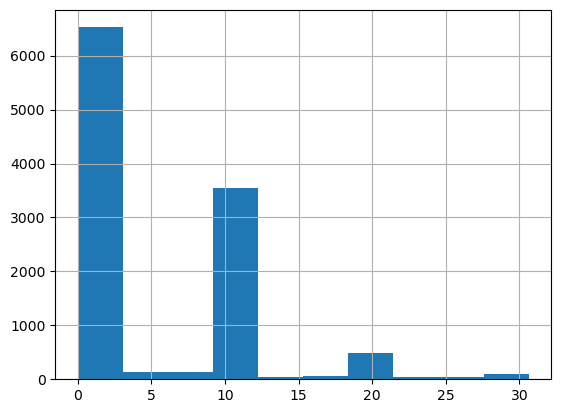

In [30]:
X_train_sample['Risk Score'].hist()

In [31]:
X_train_sample['Risk Score'].describe()

count    11092.000000
mean         5.096959
std          6.435702
min          0.008108
25%          0.164926
50%          0.553869
75%         10.165745
max         30.626769
Name: Risk Score, dtype: float64

#### Test Set

In [32]:
X_test['Risk Score'] = ( (X_test['Age'] * .3) 
                                + (X_test['Balance'] * .1) 
                                + (X_test['IsActiveMember'] * .4) 
                                + (X_test['NumOfProducts'] * .3) * 100)

<Axes: >

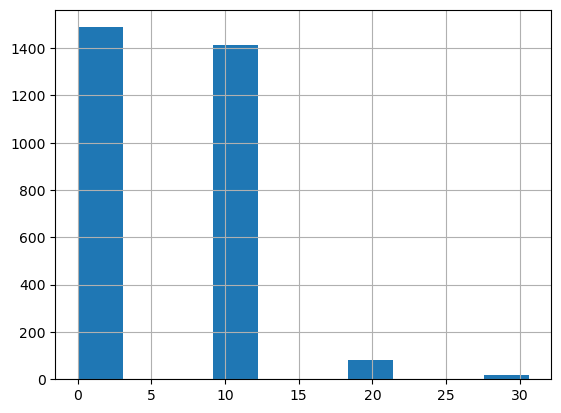

In [33]:
X_test['Risk Score'].hist()

In [34]:
X_test['Risk Score'].describe()

count    3000.000000
mean        5.761860
std         5.834131
min         0.004054
25%         0.460514
50%        10.020270
75%        10.448649
max        30.603491
Name: Risk Score, dtype: float64

### Loyalty Score

#### Train Set

In [35]:
X_train_sample['Loyalty Score'] = ((X_train_sample['Tenure']*0.2) 
                 + (X_train_sample['IsActiveMember']*0.5) 
                 + (X_train_sample['NumOfProducts']*0.3))*100

In [36]:
X_train_sample['Loyalty Score']

0        68.000000
1        64.000000
2        22.000000
3        66.000000
4        78.000000
           ...    
11087     5.662459
11088     4.562029
11089    52.885902
11090    87.122877
11091     4.000000
Name: Loyalty Score, Length: 11092, dtype: float64

<Axes: >

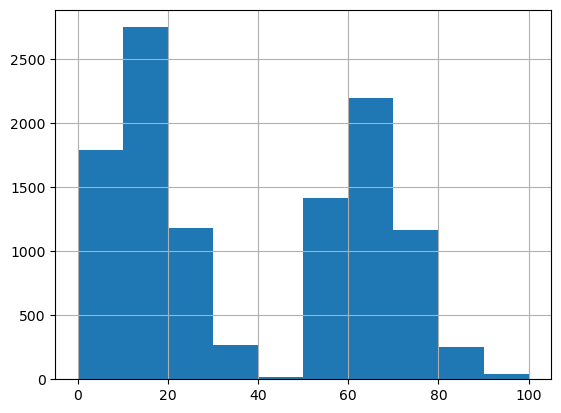

In [37]:
X_train_sample['Loyalty Score'].hist()

#### Test Set

In [38]:
X_test['Loyalty Score'] = ((X_test['Tenure']*0.2) 
                 + (X_test['IsActiveMember']*0.5) 
                 + (X_test['NumOfProducts']*0.3))*100

In [39]:
X_test['Loyalty Score'].describe()

count    3000.000000
mean       41.370667
std        25.856839
min         0.000000
25%        16.000000
50%        52.000000
75%        66.000000
max       100.000000
Name: Loyalty Score, dtype: float64

<Axes: >

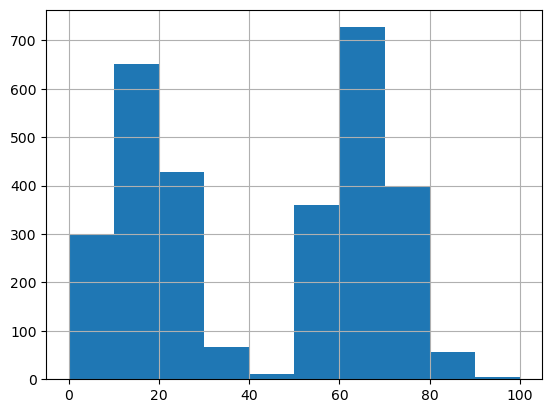

In [40]:
X_test['Loyalty Score'].hist()

### Feature Scaling

In [41]:
new_scaler = MinMaxScaler()

X_train_sample['Risk Score'] = new_scaler.fit_transform(X_train_sample[['Risk Score']])
X_test['Risk Score'] = new_scaler.transform(X_test[['Risk Score']])


X_train_sample['Loyalty Score'] = new_scaler.fit_transform(X_train_sample[['Loyalty Score']])
X_test['Loyalty Score'] = new_scaler.transform(X_test[['Loyalty Score']])


## ดูการกระจายตัวของข้อมูล

### Update Numerical Columns 

In [42]:
num_col = num_train_col + ['Risk Score', 'Loyalty Score']

In [43]:
num_col

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Complain',
 'Satisfaction Score',
 'Point Earned',
 'Risk Score',
 'Loyalty Score']

In [44]:
X_train_sample.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Complain', 'Satisfaction Score',
       'Point Earned', 'Geography_France', 'Geography_Germany',
       'Geography_Spain', 'Gender_Female', 'Gender_Male', 'Card Type_DIAMOND',
       'Card Type_GOLD', 'Card Type_PLATINUM', 'Card Type_SILVER',
       'Risk Score', 'Loyalty Score'],
      dtype='object')

In [45]:
len(X_train_sample.columns) - len(X_train_sample[cat_train_col].columns)

13

### Distribution

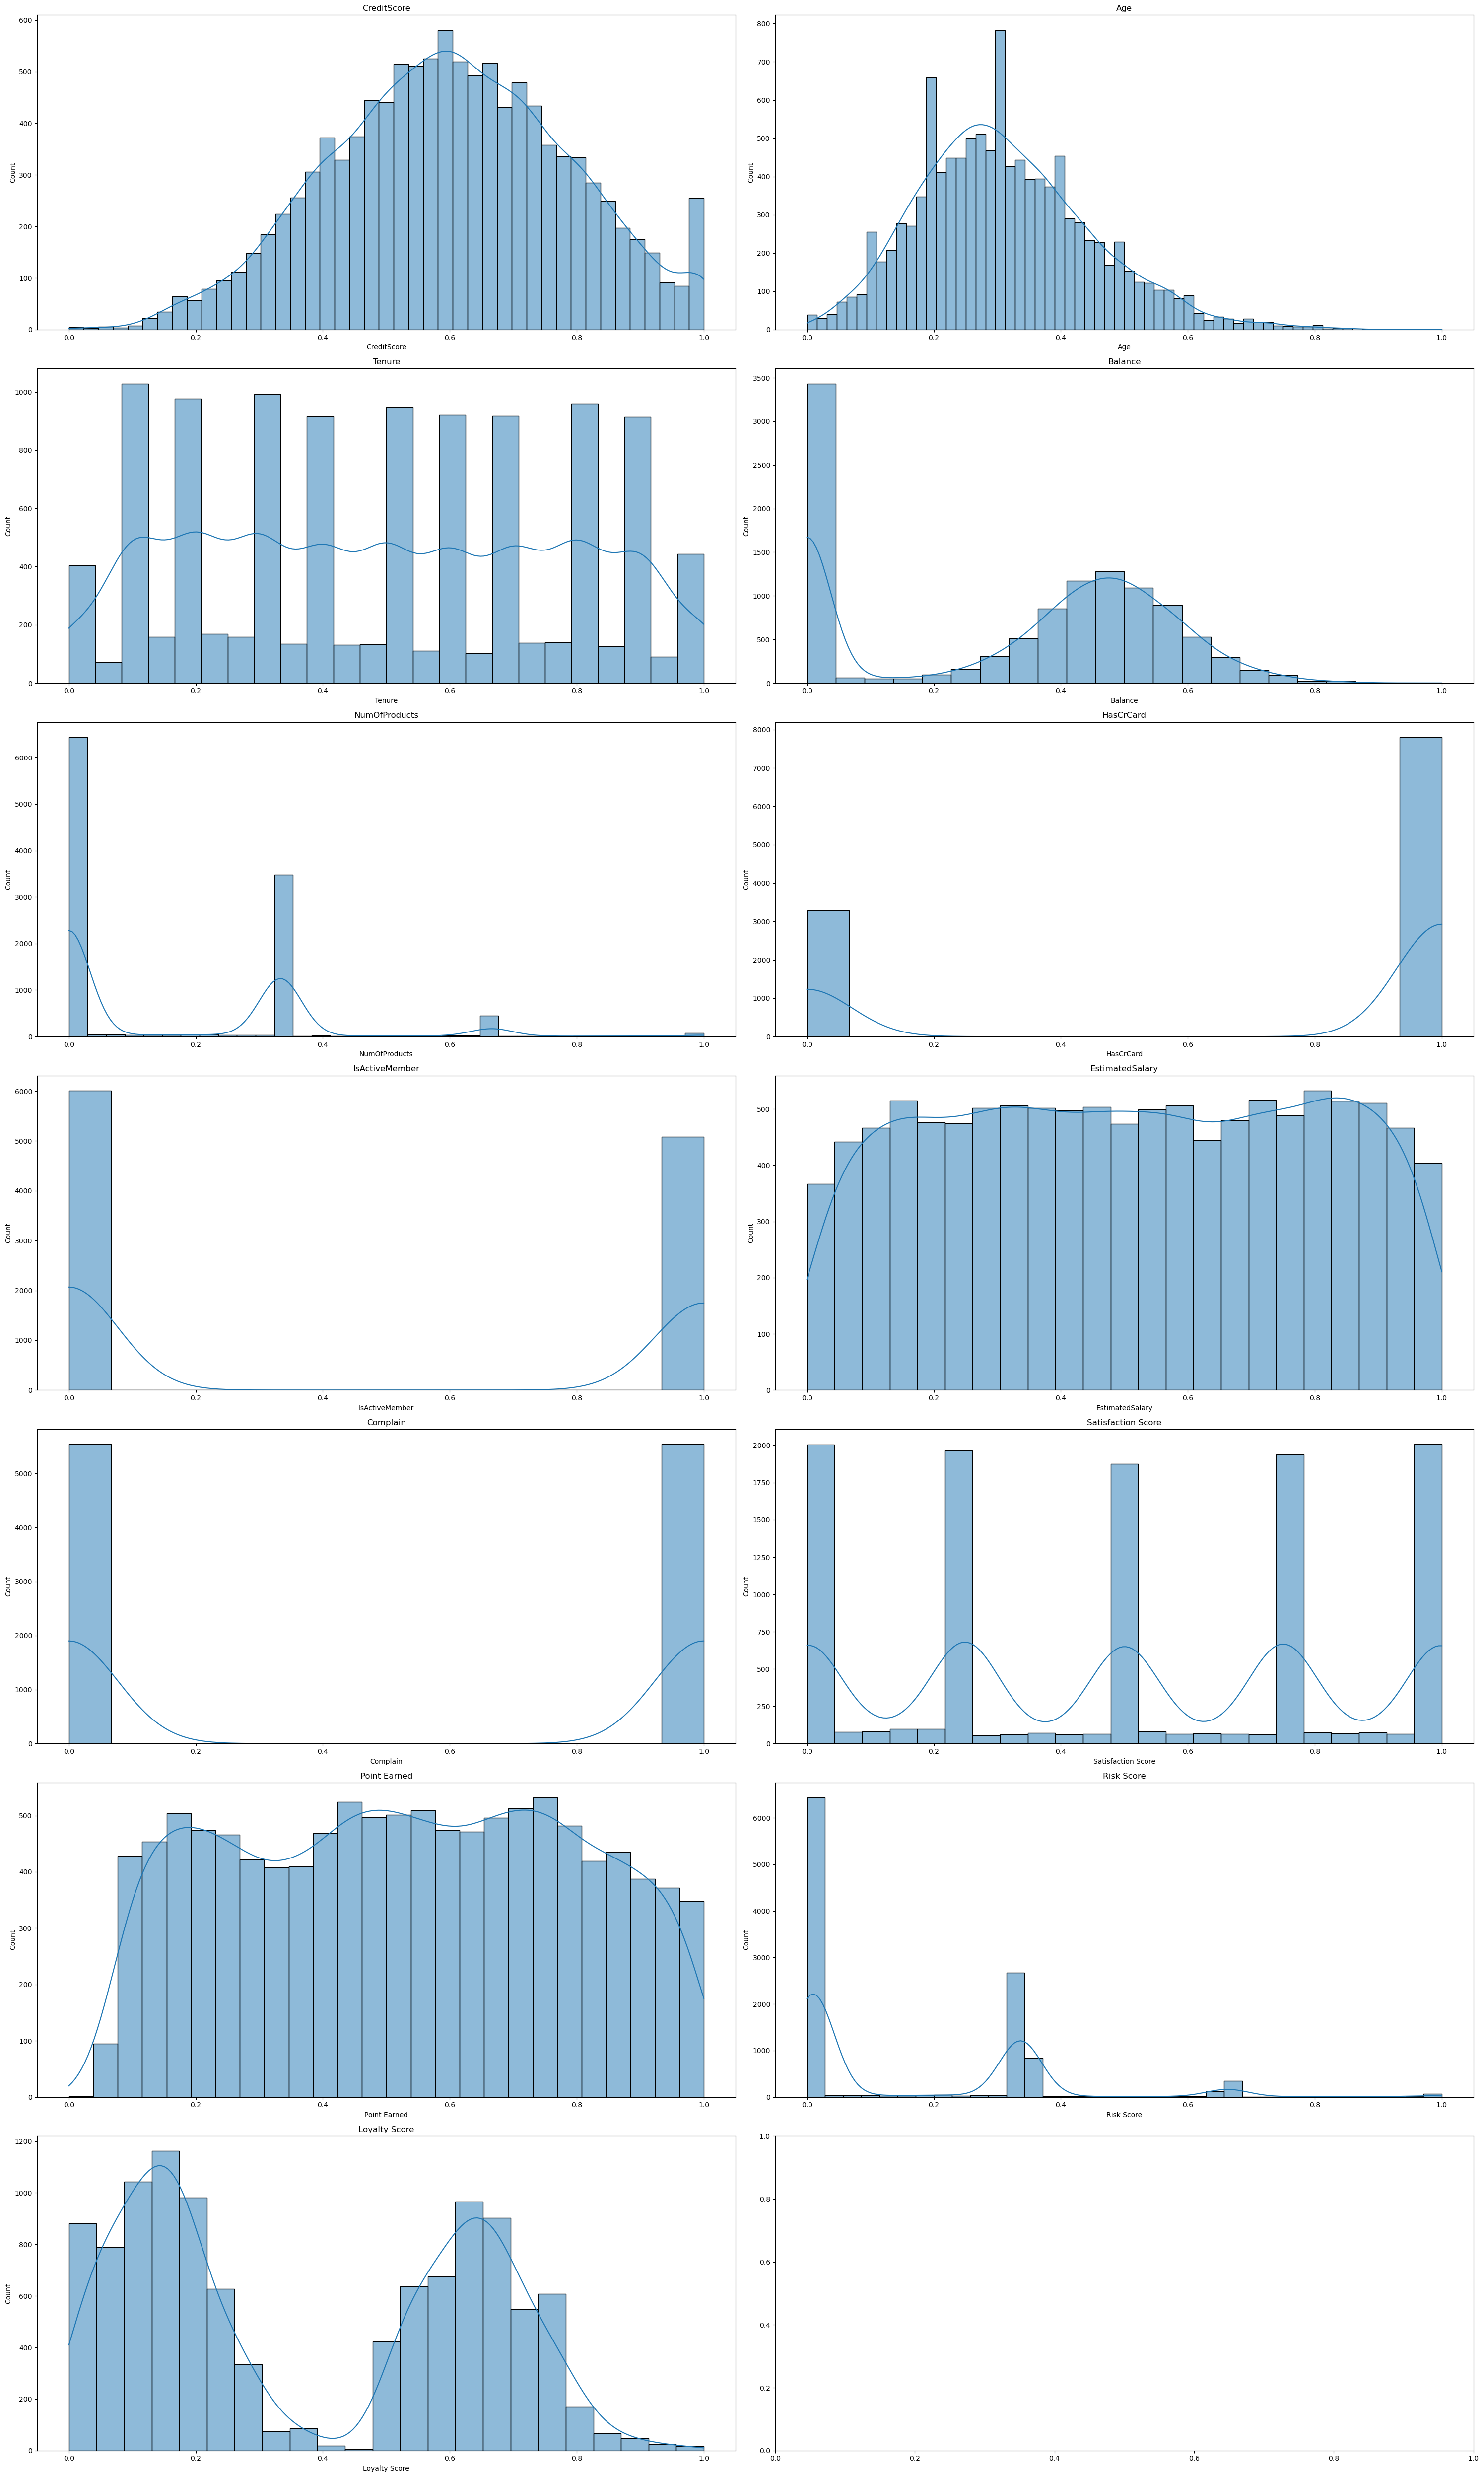

In [46]:
fig, axes = plt.subplots(nrows=7,
                        ncols=2,
                        figsize=[30 ,50])
for i, column in enumerate(X_train_sample[num_col].columns):
    row, col = divmod(i, 2)
    sns.histplot(X_train_sample[column],
                 ax=axes[row, col],
                 kde=True)
    axes[row, col].set_title(column)
plt.tight_layout()
plt.show()

## รวบข้อมูล X, y เป็น train set ก้อนเดียว

In [47]:
train_data = pd.concat([
    X_train_sample,
    y_train_sample
], axis=1)

## ตัด Outlier จาก train set

### ตรวจสอบ Outlier

In [48]:
len(num_col)

13

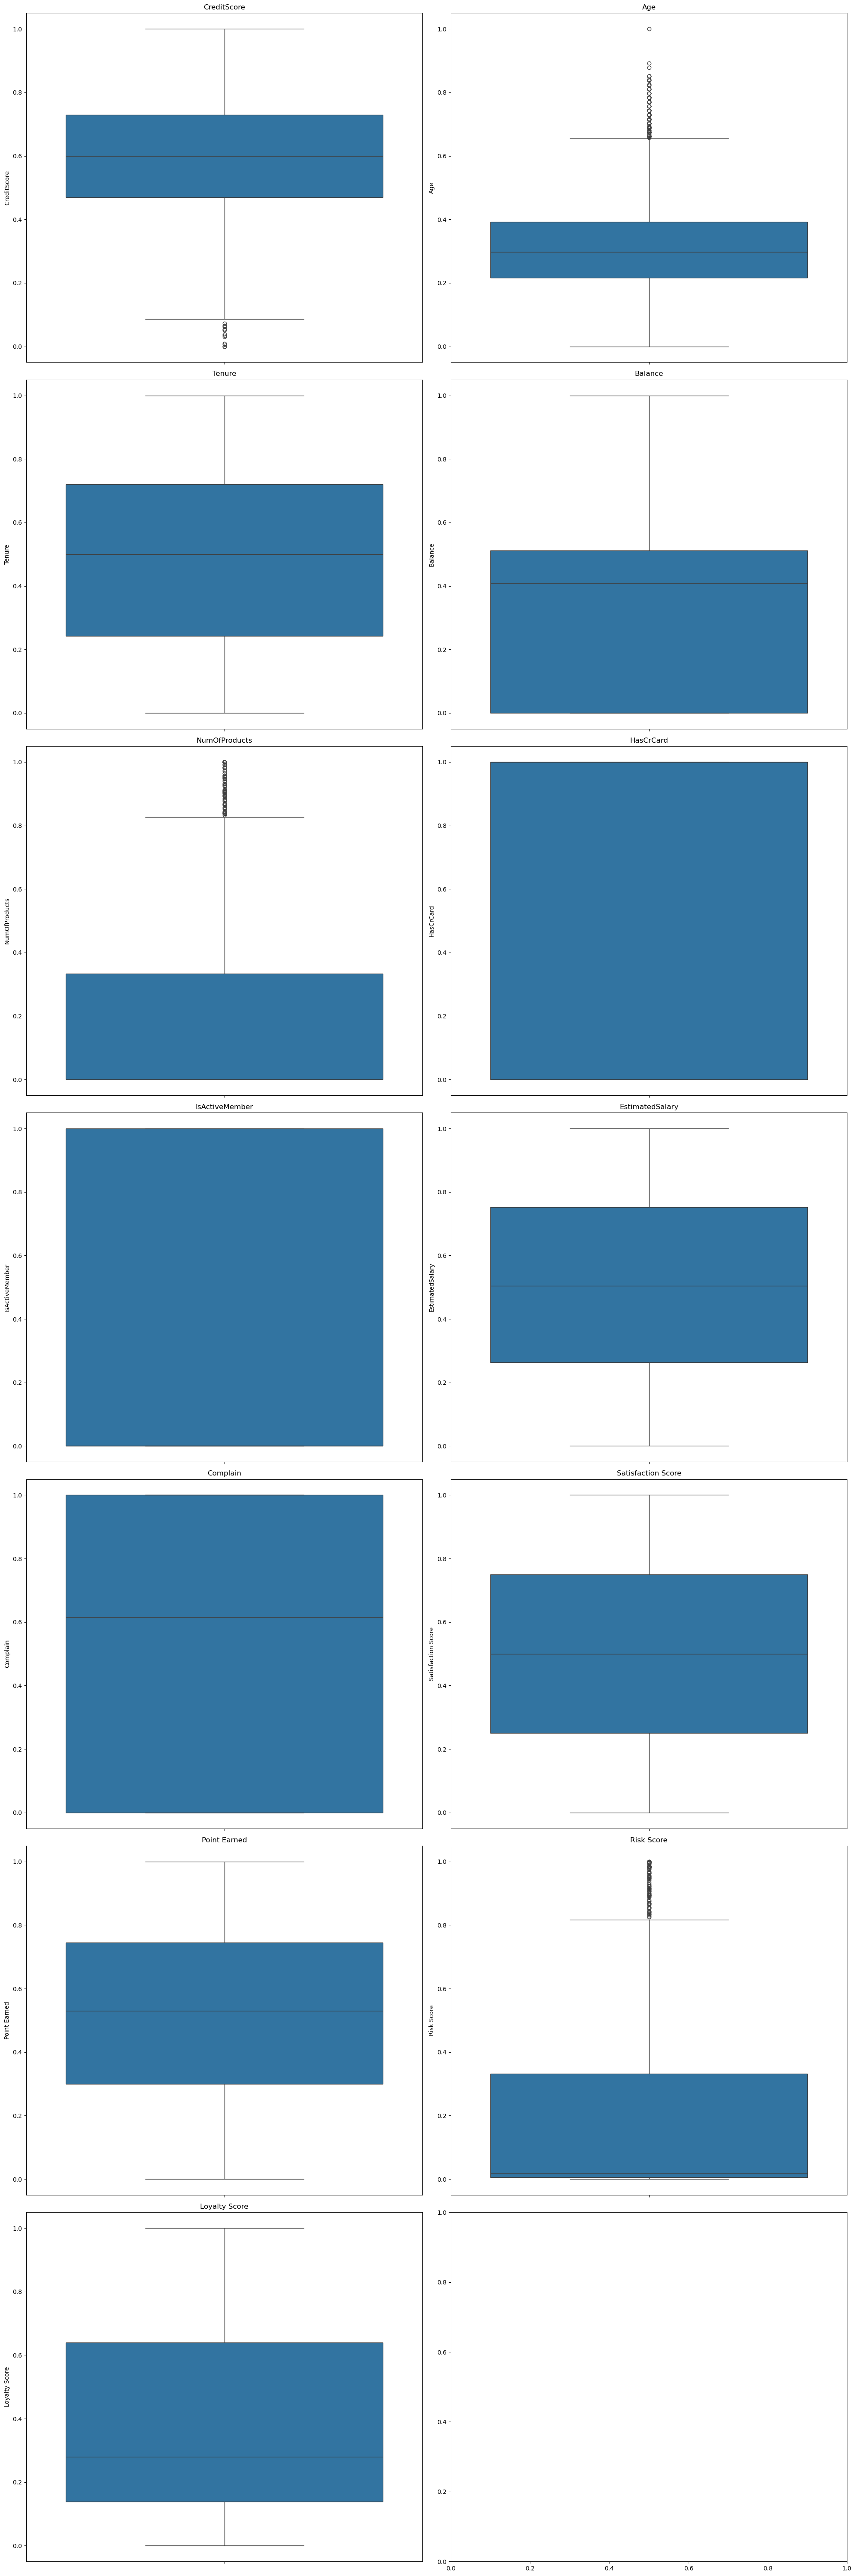

In [49]:
fig, axes = plt.subplots(nrows=7,
                        ncols=2,
                        figsize=[20, 60])
for i, column in enumerate(train_data[num_col].columns):
    row, col = divmod(i, 2)
    # axes[row, col].hist(df[column])
    sns.boxplot(train_data[column],
                 ax=axes[row, col])
    axes[row, col].set_title(column)
plt.tight_layout()
plt.show()

In [50]:
suspect_col = ['CreditScore', 'Age', 'NumOfProducts', 'Risk Score']

### IQR

In [51]:
for col in suspect_col:
    q1 = train_data[col].quantile(.25)
    q3 = train_data[col].quantile(.75)
    IQR = q3 - q1
    lower_b = q1 - (IQR * 1.75)
    upper_b = q3 + (IQR * 1.75)
    print(f'{col}:')
    print(f'upper_bond = {upper_b}:')
    print(f'lower_bond = {lower_b}:')
    print('\n')

CreditScore:
upper_bond = 1.1859843787626552:
lower_bond = 0.013255546993334144:


Age:
upper_bond = 0.6994087547266024:
lower_bond = -0.09126994465402949:


NumOfProducts:
upper_bond = 0.9166666666666665:
lower_bond = -0.5833333333333333:


Risk Score:
upper_bond = 0.9033402740704235:
lower_bond = -0.566472025058751:




### กรอง Outlier

In [52]:
creditscore_condition = ((train_data['CreditScore'] >= 0.0172729685651849) & (train_data['CreditScore'] <= 1.1802808381857912))
age_condition = ((train_data['Age'] >= -0.09680261499374149) & (train_data['Age'] <= 0.7081029509747212))
numofproducts_condition = ((train_data['NumOfProducts'] >= -0.5833333333333333) & (train_data['NumOfProducts'] <= 0.9166666666666665))
risk_score_condition = ( (train_data['Risk Score'] >= -17.371413079051315) & (train_data['Risk Score'] <= 27.72695659329569) )

In [53]:
train_data = train_data[
    creditscore_condition & age_condition & numofproducts_condition & risk_score_condition
]

In [54]:
train_data.shape

(10896, 23)

In [55]:
train_data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,...,Geography_Spain,Gender_Female,Gender_Male,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER,Risk Score,Loyalty Score,Exited
0,0.538,0.189189,0.4,0.699113,0.333333,1.0,1.0,0.864027,1.0,0.0,...,1,1,0,1,0,0,0,0.343534,0.68,1
1,0.586,0.216216,0.7,0.639407,0.000000,0.0,1.0,0.942778,0.0,0.5,...,0,1,0,0,1,0,0,0.017006,0.64,0
2,0.422,0.202703,0.6,0.000000,0.333333,0.0,0.0,0.868470,0.0,0.5,...,0,0,1,1,0,0,0,0.328319,0.22,0
3,0.536,0.310811,0.8,0.150271,0.000000,1.0,1.0,0.979011,0.0,1.0,...,0,0,1,0,1,0,0,0.016335,0.66,0
4,0.728,0.256757,0.9,0.591742,0.333333,0.0,1.0,0.756406,0.0,0.5,...,0,0,1,0,0,0,1,0.343846,0.78,0


In [56]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10896 entries, 0 to 11091
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10896 non-null  float64
 1   Age                 10896 non-null  float64
 2   Tenure              10896 non-null  float64
 3   Balance             10896 non-null  float64
 4   NumOfProducts       10896 non-null  float64
 5   HasCrCard           10896 non-null  float64
 6   IsActiveMember      10896 non-null  float64
 7   EstimatedSalary     10896 non-null  float64
 8   Complain            10896 non-null  float64
 9   Satisfaction Score  10896 non-null  float64
 10  Point Earned        10896 non-null  float64
 11  Geography_France    10896 non-null  int64  
 12  Geography_Germany   10896 non-null  int64  
 13  Geography_Spain     10896 non-null  int64  
 14  Gender_Female       10896 non-null  int64  
 15  Gender_Male         10896 non-null  int64  
 16  Card Type

In [57]:
# test_data = pd.concat([
#     X_test,
#     y_test
# ], axis=1)

# test_data.to_csv('test.csv')

In [58]:
train_data['Exited'].value_counts()

Exited
0    5458
1    5438
Name: count, dtype: int64

## ตรวจสอบข้อมูลครั้งสุดท้าย

In [59]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10896 entries, 0 to 11091
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10896 non-null  float64
 1   Age                 10896 non-null  float64
 2   Tenure              10896 non-null  float64
 3   Balance             10896 non-null  float64
 4   NumOfProducts       10896 non-null  float64
 5   HasCrCard           10896 non-null  float64
 6   IsActiveMember      10896 non-null  float64
 7   EstimatedSalary     10896 non-null  float64
 8   Complain            10896 non-null  float64
 9   Satisfaction Score  10896 non-null  float64
 10  Point Earned        10896 non-null  float64
 11  Geography_France    10896 non-null  int64  
 12  Geography_Germany   10896 non-null  int64  
 13  Geography_Spain     10896 non-null  int64  
 14  Gender_Female       10896 non-null  int64  
 15  Gender_Male         10896 non-null  int64  
 16  Card Type

In [60]:
train_data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,...,Geography_Spain,Gender_Female,Gender_Male,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER,Risk Score,Loyalty Score,Exited
count,10896.000000,10896.000000,10896.000000,10896.000000,10896.000000,10896.000000,10896.000000,10896.000000,10896.000000,10896.000000,...,10896.000000,10896.000000,10896.000000,10896.000000,10896.000000,10896.000000,10896.000000,10896.000000,10896.000000,10896.000000
mean,0.599233,0.307620,0.493680,0.324815,0.152595,0.704479,0.453286,0.505428,0.499139,0.498126,...,0.234765,0.491832,0.508168,0.264501,0.240914,0.251285,0.243300,0.159243,0.371157,0.499082
std,0.186056,0.131129,0.284850,0.240632,0.201235,0.456298,0.497836,0.282506,0.499967,0.348560,...,0.423871,0.499956,0.499956,0.441087,0.427658,0.433772,0.429095,0.197422,0.264782,0.500022
min,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.468986,0.216216,0.240192,0.000000,0.000000,0.000000,0.000000,0.263327,0.000000,0.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005050,0.132359,0.000000
50%,0.600000,0.297297,0.500000,0.409082,0.000000,1.000000,0.000000,0.504228,0.000000,0.500000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.017680,0.260000,0.000000
75%,0.730000,0.391892,0.718135,0.512042,0.333333,1.000000,1.000000,0.752782,1.000000,0.750000,...,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.331200,0.640000,1.000000
max,1.000000,0.702703,1.000000,1.000000,0.914362,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.914411,0.951423,1.000000


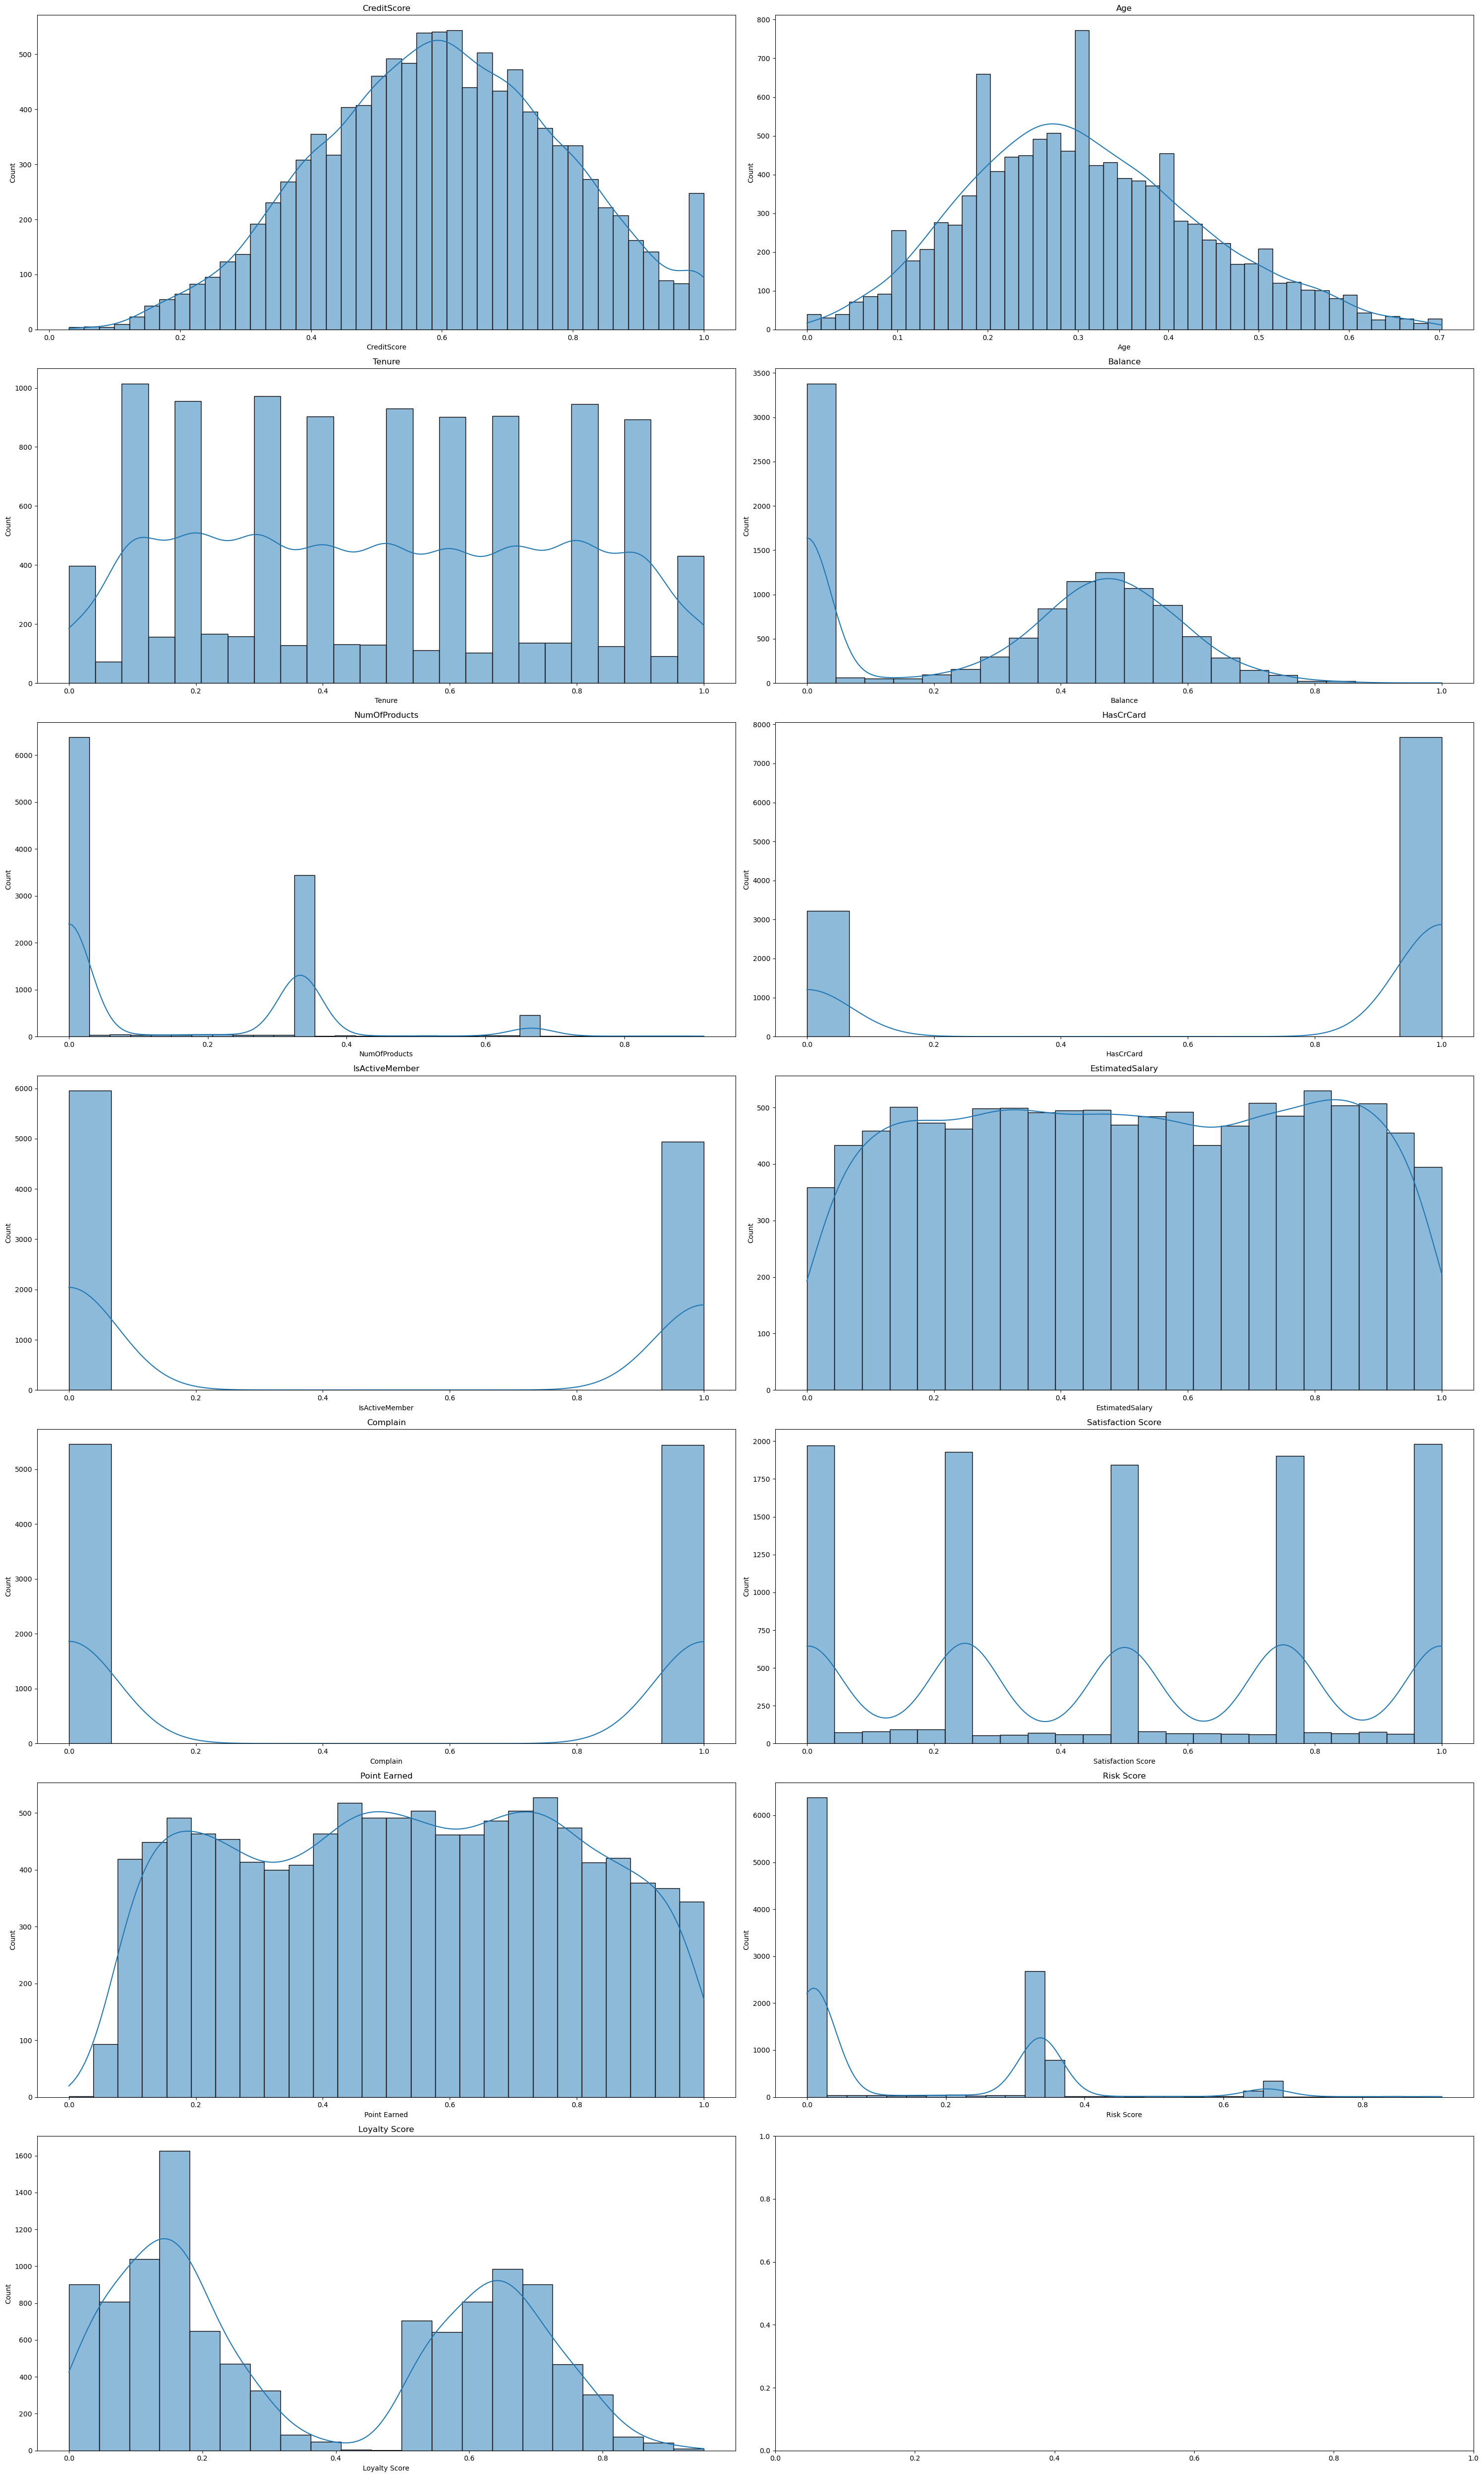

In [61]:
fig, axes = plt.subplots(nrows=7,
                        ncols=2,
                        figsize=[30 ,50])
for i, column in enumerate(train_data[num_col].columns):
    row, col = divmod(i, 2)
    sns.histplot(train_data[column],
                 ax=axes[row, col],
                 kde=True)
    axes[row, col].set_title(column)
plt.tight_layout()
plt.show()

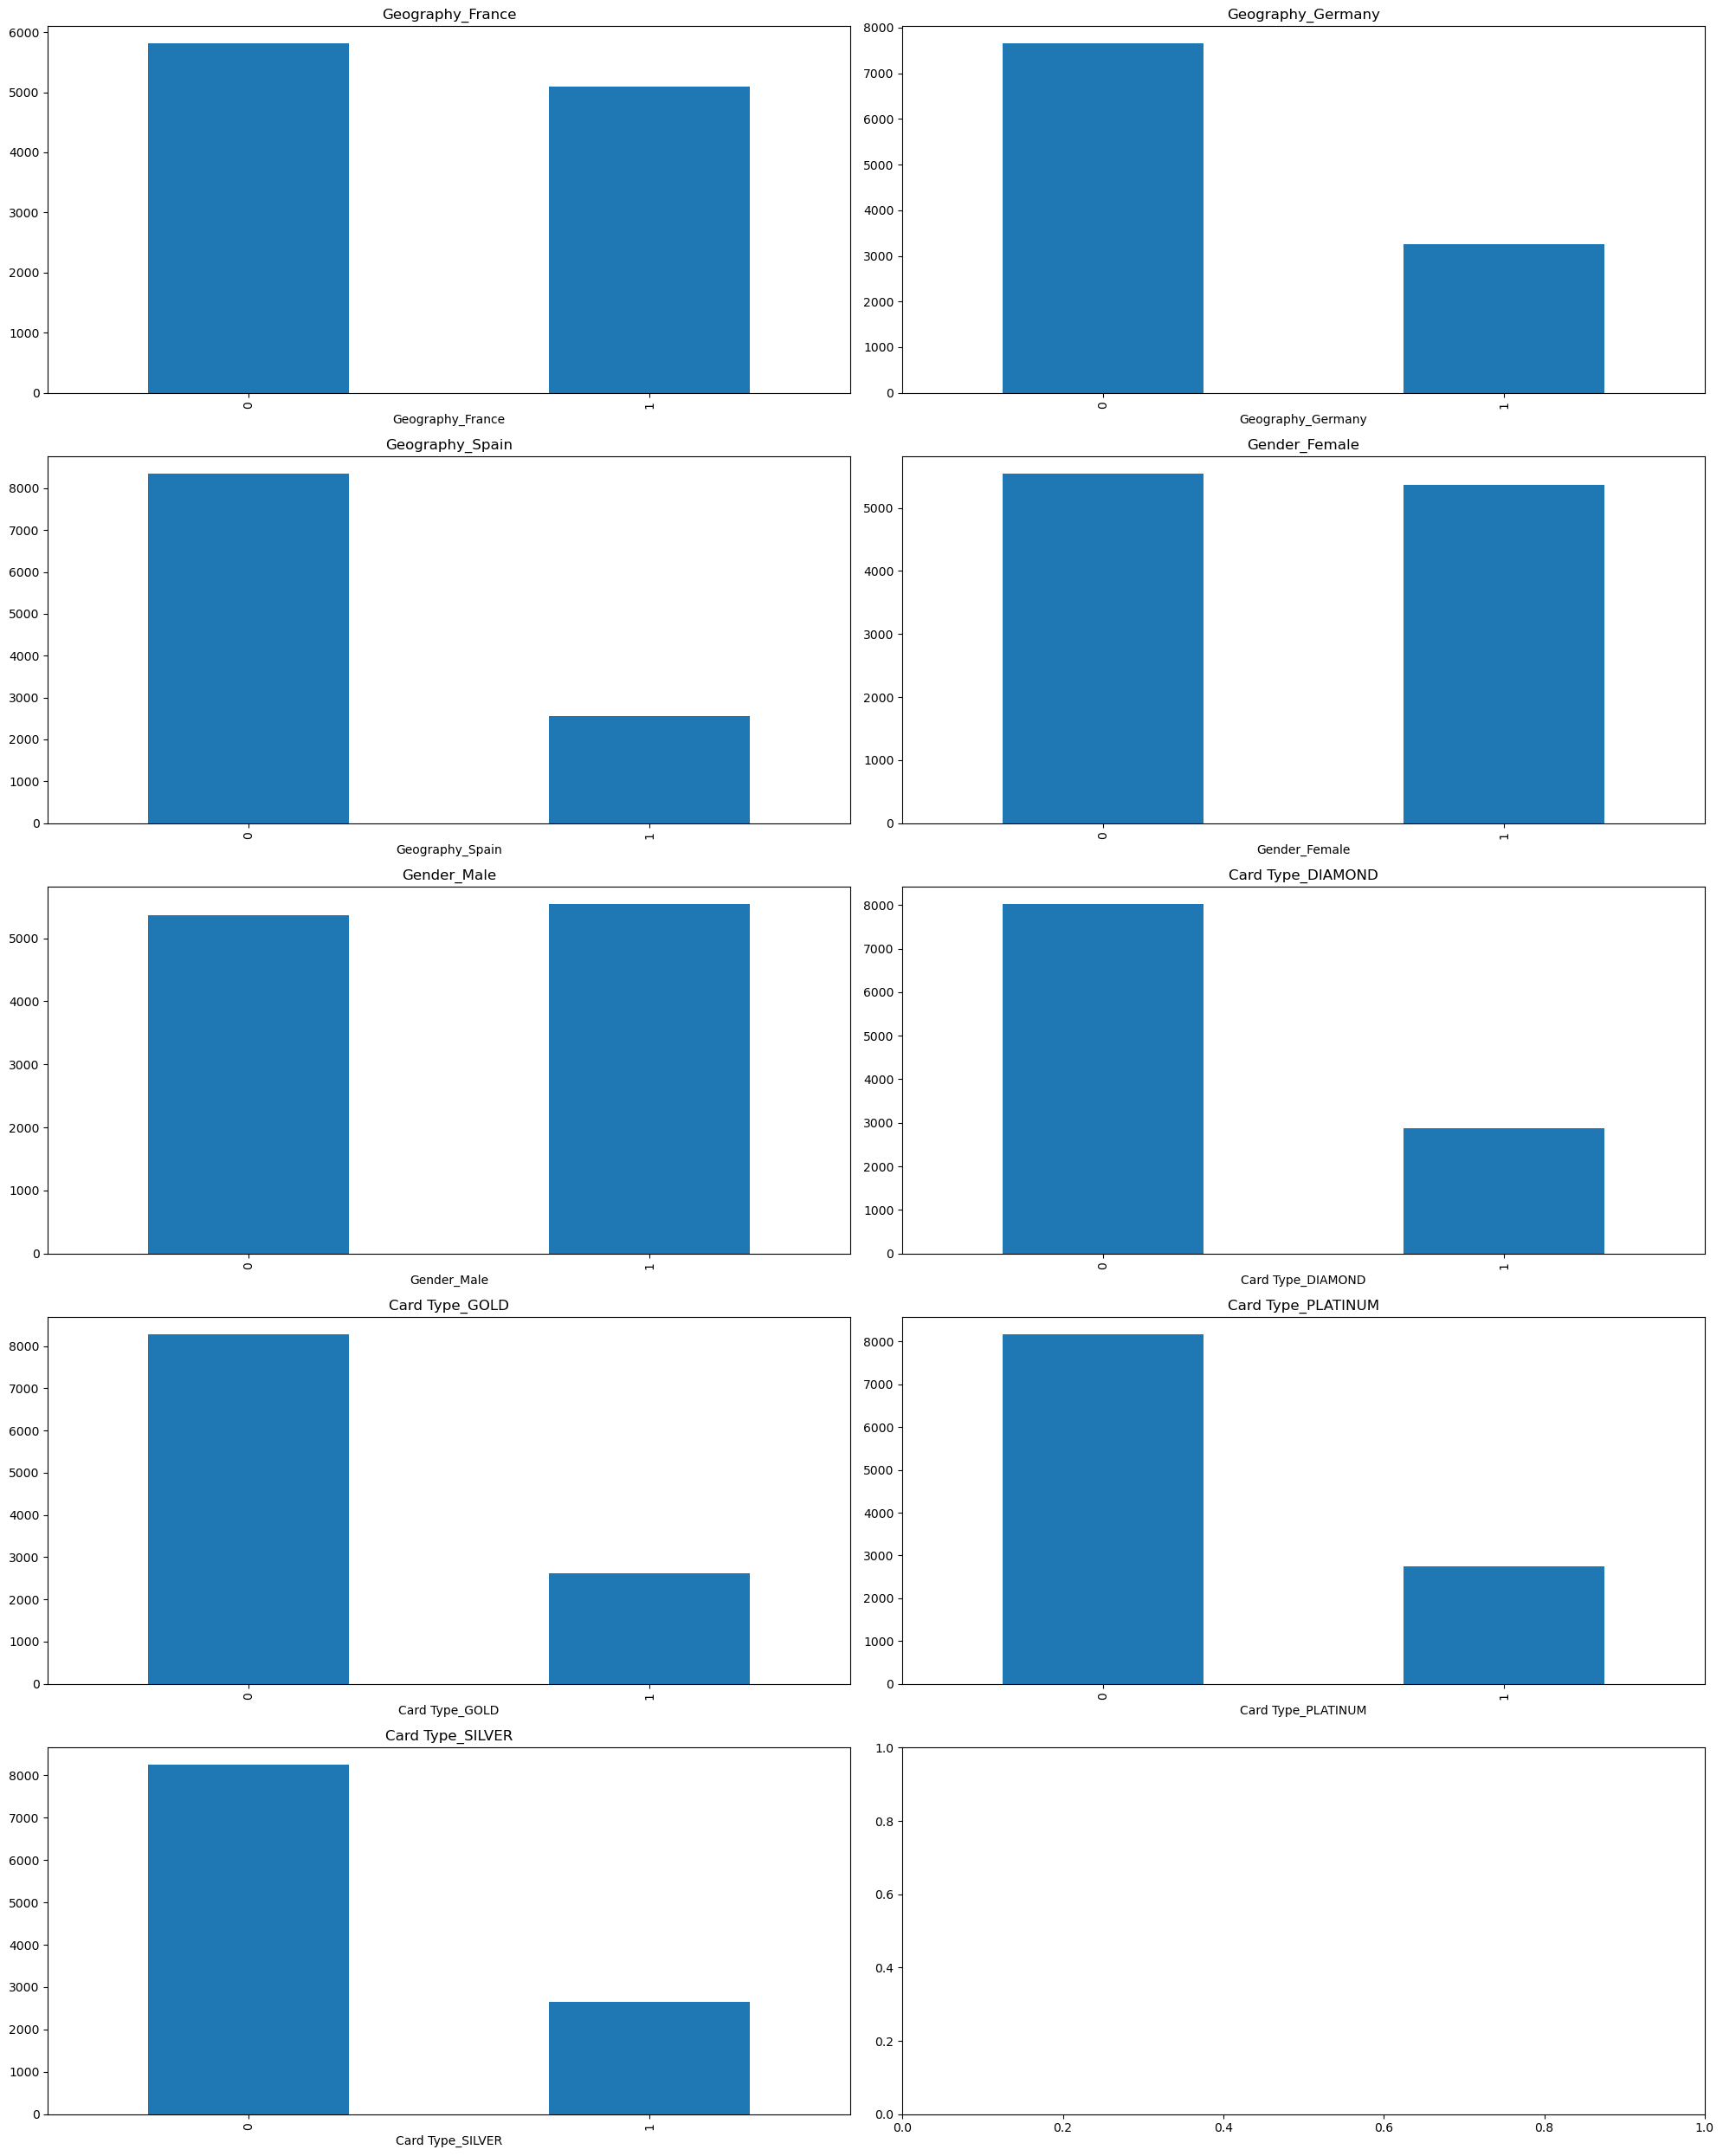

In [62]:
fig, axes = plt.subplots(nrows=5,
                        ncols=2,
                        figsize=[20 ,25])
for i, column in enumerate(train_data[cat_train_col].columns):
    row, col = divmod(i, 2)
    train_data.groupby(column)[column].value_counts().plot(kind='bar',
                                                   ax=axes[row, col])
    axes[row, col].set_title(column)
plt.tight_layout()
plt.show()

In [63]:
for col in cat_train_col:
    print(train_data.groupby(col)[col].sum())
    print('\n')

Geography_France
0       0
1    5089
Name: Geography_France, dtype: int64


Geography_Germany
0       0
1    3249
Name: Geography_Germany, dtype: int64


Geography_Spain
0       0
1    2558
Name: Geography_Spain, dtype: int64


Gender_Female
0       0
1    5359
Name: Gender_Female, dtype: int64


Gender_Male
0       0
1    5537
Name: Gender_Male, dtype: int64


Card Type_DIAMOND
0       0
1    2882
Name: Card Type_DIAMOND, dtype: int64


Card Type_GOLD
0       0
1    2625
Name: Card Type_GOLD, dtype: int64


Card Type_PLATINUM
0       0
1    2738
Name: Card Type_PLATINUM, dtype: int64


Card Type_SILVER
0       0
1    2651
Name: Card Type_SILVER, dtype: int64




## Export Dataset

In [64]:
# Train set
train_data.to_csv('train_ver_1.csv')

In [65]:
# Test set
test_data = pd.concat([
    X_test,
    y_test
], axis=1)

test_data.to_csv('test_ver_1.csv')

In [66]:
train_data.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Complain', 'Satisfaction Score',
       'Point Earned', 'Geography_France', 'Geography_Germany',
       'Geography_Spain', 'Gender_Female', 'Gender_Male', 'Card Type_DIAMOND',
       'Card Type_GOLD', 'Card Type_PLATINUM', 'Card Type_SILVER',
       'Risk Score', 'Loyalty Score', 'Exited'],
      dtype='object')

In [67]:
test_data.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Complain', 'Satisfaction Score',
       'Point Earned', 'Geography_France', 'Geography_Germany',
       'Geography_Spain', 'Gender_Female', 'Gender_Male', 'Card Type_DIAMOND',
       'Card Type_GOLD', 'Card Type_PLATINUM', 'Card Type_SILVER',
       'Risk Score', 'Loyalty Score', 'Exited'],
      dtype='object')

In [68]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10896 entries, 0 to 11091
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10896 non-null  float64
 1   Age                 10896 non-null  float64
 2   Tenure              10896 non-null  float64
 3   Balance             10896 non-null  float64
 4   NumOfProducts       10896 non-null  float64
 5   HasCrCard           10896 non-null  float64
 6   IsActiveMember      10896 non-null  float64
 7   EstimatedSalary     10896 non-null  float64
 8   Complain            10896 non-null  float64
 9   Satisfaction Score  10896 non-null  float64
 10  Point Earned        10896 non-null  float64
 11  Geography_France    10896 non-null  int64  
 12  Geography_Germany   10896 non-null  int64  
 13  Geography_Spain     10896 non-null  int64  
 14  Gender_Female       10896 non-null  int64  
 15  Gender_Male         10896 non-null  int64  
 16  Card Type

In [69]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3000 entries, 6252 to 4705
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         3000 non-null   float64
 1   Age                 3000 non-null   float64
 2   Tenure              3000 non-null   float64
 3   Balance             3000 non-null   float64
 4   NumOfProducts       3000 non-null   float64
 5   HasCrCard           3000 non-null   float64
 6   IsActiveMember      3000 non-null   float64
 7   EstimatedSalary     3000 non-null   float64
 8   Complain            3000 non-null   float64
 9   Satisfaction Score  3000 non-null   float64
 10  Point Earned        3000 non-null   float64
 11  Geography_France    3000 non-null   int64  
 12  Geography_Germany   3000 non-null   int64  
 13  Geography_Spain     3000 non-null   int64  
 14  Gender_Female       3000 non-null   int64  
 15  Gender_Male         3000 non-null   int64  
 16  Card Typ